In [6]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt


<AxesSubplot: >

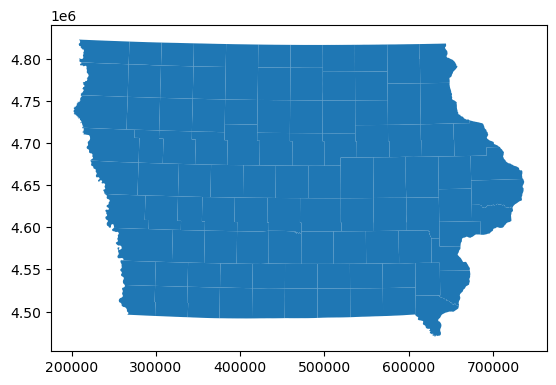

In [7]:
boundaries = gp.read_file('Data/county_boundaries')
boundaries.drop(columns = ['CO_NUMBER', 'CO_FIPS', 'ACRES', 'ST'], inplace = True)
boundaries.plot()

In [8]:
county_rank_2017 = pd.read_csv('Data/analytic_data2017.csv', header = 1)
county_rank_2018 = pd.read_csv('Data/analytic_data2018.csv', header = 1)
county_rank_2019 = pd.read_csv('Data/analytic_data2019.csv', header = 1)
county_rank_2020 = pd.read_csv('Data/analytic_data2020.csv', header = 1)
county_rank_2021 = pd.read_csv('Data/analytic_data2021.csv', header = 1)
county_rank_2022 = pd.read_csv('Data/analytic_data2022.csv', header = 1)
county_rank_2023 = pd.read_csv('Data/analytic_data2023.csv', header = 1)

In [9]:
def clean_rank_data(df):
    # Query only those rows with Iowa as state, and reset index
    df = df.query('state == "IA"')
    df.reset_index(drop=True, inplace=True)
    # Keep only relevant columns
    cols_keep = ['year', 'fipscode', 'county', 'v049_rawvalue', 'v134_rawvalue', 'v134_numerator']
    df = df[df.columns[df.columns.isin(cols_keep)]]
    # Rename the columns kept
    df.rename(columns = {'v049_rawvalue':'exss_drink', 'v134_rawvalue':'deathspct', 'v134_numerator':'deathstot'}, inplace=True)
    # Change some data types: year to integer, deaths to integer, fipscode to string
    df.year = df.year.apply(lambda x : int(x))
    df.deathstot = df.deathstot.apply(lambda x : int(x))
    df.fipscode = df.fipscode.apply(lambda x : str(x)[:-2] if len(str(x)) > 5 else str(x))
    # Drop the first row, becuase its the observation for the entire state, we only want counties
    df.drop([0], inplace=True)
    # Merge with geospatial data, and return a geo data frame
    df = pd.merge(boundaries, df, how = 'inner', left_on = 'FIPS', right_on = 'fipscode')
    df.drop(columns = ['fipscode', 'county'], inplace = True)
    df.rename(columns = {'Shape_Leng' : })
    cols_order = ['FIPS', 'COUNTY', 'year', 'exss_drink', 'deathspct', 
                'deathstot', 'Shape_Leng', 'Shape_Area', 'AREA', 'PERIMETER', 'geometry']
    df = df.reindex(columns = cols_order)
    return df

In [ ]:
# exss_drink  --> excessive drinking
# deathspct --> alcohol impaired driving deaths percent
# deathstot --> alcohol impaired driving deaths total

<AxesSubplot: >

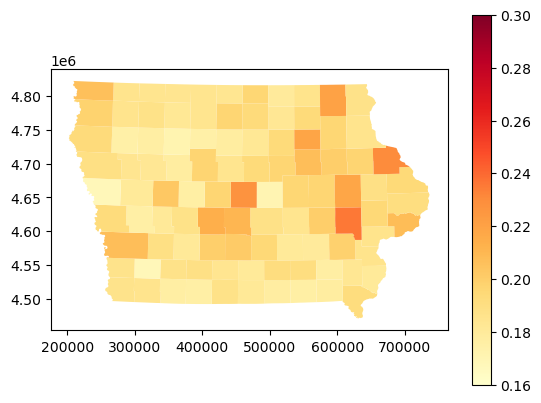

In [10]:
clean_rank_data(county_rank_2017).plot(column = 'exss_drink', cmap=plt.get_cmap('YlOrRd'), legend=True, vmin=0.16, vmax=0.30)

<AxesSubplot: >

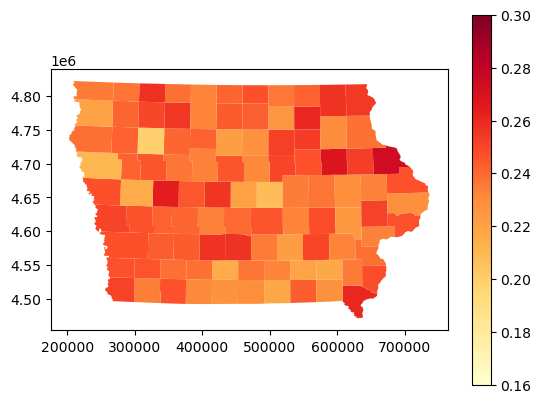

In [12]:
clean_rank_data(county_rank_2023).plot(column = 'exss_drink', cmap=plt.get_cmap('YlOrRd'), legend=True, vmin=0.16, vmax=0.30)

In [13]:
data_2017 = clean_rank_data(county_rank_2017)
data_2018 = clean_rank_data(county_rank_2018)
data_2019 = clean_rank_data(county_rank_2019)
data_2020 = clean_rank_data(county_rank_2020)
data_2021 = clean_rank_data(county_rank_2021)
data_2022 = clean_rank_data(county_rank_2022)
data_2023 = clean_rank_data(county_rank_2023)

In [14]:
data_2017

,FIPS,COUNTY,year,exss_drink,deathspct,deathstot,Shape_Leng,Shape_Area,AREA,PERIMETER,geometry
0,19111,Lee,2017,0.192232,0.354839,11,192784.420113,1.394780e+09,1.394780e+09,192783.7,"POLYGON ((634170.676 4519205.254, 634170.989 4..."
1,19007,Appanoose,2017,0.176955,0.312500,5,146566.360164,1.335647e+09,1.335647e+09,146566.5,"POLYGON ((530372.212 4527603.237, 530385.212 4..."
2,19185,Wayne,2017,0.181529,0.000000,0,147784.689987,1.364467e+09,1.364467e+09,147785.1,"POLYGON ((454680.164 4527594.006, 454692.977 4..."
3,19053,Decatur,2017,0.187592,0.222222,2,148600.585139,1.381359e+09,1.381359e+09,148600.8,"POLYGON ((435311.961 4527873.727, 436775.740 4..."
4,19051,Davis,2017,0.176323,0.400000,2,144994.231402,1.306355e+09,1.306355e+09,144995.3,"POLYGON ((569161.195 4526464.814, 569170.313 4..."
...,...,...,...,...,...,...,...,...,...,...,...
94,19005,Allamakee,2017,0.186958,0.357143,5,172889.849036,1.706997e+09,1.706997e+09,172890.3,"POLYGON ((644089.135 4817941.370, 644087.947 4..."
95,19063,Emmet,2017,0.184437,0.500000,5,130956.405818,1.042274e+09,1.042274e+09,130956.8,"POLYGON ((346561.975 4818185.438, 348176.864 4..."
96,19059,Dickinson,2017,0.185130,0.000000,0,131289.384875,1.045939e+09,1.045939e+09,131290.5,"POLYGON ((307958.677 4819102.169, 307994.083 4..."
97,19143,Osceola,2017,0.185678,0.000000,0,130928.378639,1.034521e+09,1.034521e+09,130929.6,"POLYGON ((270312.301 4820252.553, 271928.576 4..."


In [15]:
data_2017.columns

Index(['FIPS', 'COUNTY', 'year', 'exss_drink', 'deathspct', 'deathstot',
       'Shape_Leng', 'Shape_Area', 'AREA', 'PERIMETER', 'geometry'],
      dtype='object')

In [20]:
data_2020.to_file('health_data2020', driver='ESRI Shapefile')

In [16]:
import geopandas as gpd

# Define the paths to the input Geopandas dataframes and the output geodatabase
data_frames = [data_2017, data_2018, data_2019, data_2020, data_2021, data_2022, data_2023]
output_gdb = 'output.gdb'

# Loop through the input dataframes and convert each one to a feature class in the geodatabase
for i, gdf in enumerate(data_frames):
    # Define the name of the output feature class
    output_name = 'feature_class{}'.format(i+1)
    
    # Write the Geopandas dataframe to the geodatabase as a feature class
    gdf.to_file(output_gdb, layer=output_name, driver='ESRI Shapefile')


### **Draft from here onwards**

In [109]:
county_rank_2017 = pd.read_csv('Data/analytic_data2017.csv', header = 1)

In [111]:
# Discard columns for 2017 - 2022, leave only FIPS
county_rank_2017 = county_rank_2017.query('state == "IA"')
county_rank_2017.reset_index(drop=True, inplace=True)
cols_keep = ['year', 'fipscode', 'county', 'v049_rawvalue', 'v134_rawvalue', 'v134_numerator']
county_rank_2017 = county_rank_2017[county_rank_2017.columns[county_rank_2017.columns.isin(cols_keep)]]

# Rename columns...

county_rank_2017.rename(columns = {'v049_rawvalue':'excessive_drinking', 'v134_rawvalue':'alcohol_impaired_driving_deaths_pct', 'v134_numerator':'alcohol_impaired_driving_deaths'}, inplace=True)

# county_rank_2017.drop
# Get rid of state??? or keep
county_rank_2017.year = county_rank_2017.year.apply(lambda x : int(x))
county_rank_2017.alcohol_impaired_driving_deaths = county_rank_2017.alcohol_impaired_driving_deaths.apply(lambda x : int(x))
county_rank_2017.fipscode = county_rank_2017.fipscode.apply(lambda x : str(x)[:-2])
county_rank_2017.drop([0], inplace=True)

Text(0.5, 1.0, 'Excessive Drinking by County (2017)')

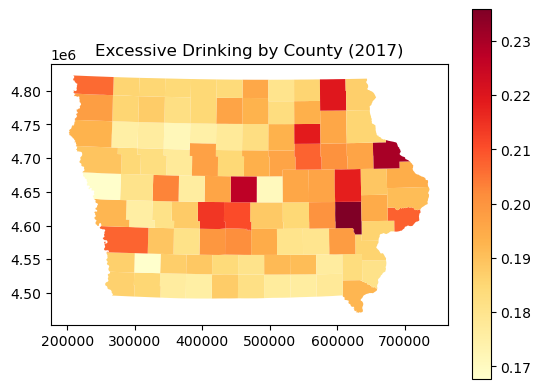

In [159]:

# Create a color map that ranges from light yellow to dark red
cmap = plt.get_cmap('YlOrRd')

# Set the range of colors based on the range of values in the 'excessive_drinking' column
vmin, vmax = county_rank_2017['excessive_drinking'].min(), county_rank_2017['excessive_drinking'].max()

# Plot the choropleth map with a legend
ax = pd.merge(boundaries, county_rank_2017, how='inner', left_on='FIPS', right_on='fipscode').plot(column='excessive_drinking', cmap=cmap, legend=True, vmin=vmin, vmax=vmax)

# Set the title of the plot
ax.set_title('Excessive Drinking by County (2017)')


In [122]:
county_rank_2017.pivot_table(columns = ['fipscode', 'county', 'year'])

fipscode,19001,19003,19005,19007,19009,19011,19013,19015,19017,19019,...,19179,19181,19183,19185,19187,19189,19191,19193,19195,19197
county,Adair County,Adams County,Allamakee County,Appanoose County,Audubon County,Benton County,Black Hawk County,Boone County,Bremer County,Buchanan County,...,Wapello County,Warren County,Washington County,Wayne County,Webster County,Winnebago County,Winneshiek County,Woodbury County,Worth County,Wright County
year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
alcohol_impaired_driving_deaths,5.000000,1.000000,5.000000,5.000000,2.000000,11.000000,8.000000,6.000000,1.000000,1.000000,...,3.000000,10.000000,2.000000,0.000000,4.000000,1.000000,3.000000,15.000000,2.000000,4.000000
alcohol_impaired_driving_deaths_pct,0.312500,0.142857,0.357143,0.312500,0.250000,0.323529,0.166667,0.260870,0.125000,0.100000,...,0.187500,0.322581,0.133333,0.000000,0.133333,0.333333,0.333333,0.272727,0.153846,0.333333
excessive_drinking,0.181132,0.187186,0.186958,0.176955,0.181189,0.196473,0.207425,0.196409,0.218726,0.200468,...,0.191089,0.201446,0.198460,0.181529,0.196971,0.183917,0.219659,0.189391,0.195581,0.177608


In [133]:
county_rank_2017.pivot_table(index = ['fipscode', 'county'], columns = ['year']).reset_index()

,fipscode,county,alcohol_impaired_driving_deaths,alcohol_impaired_driving_deaths_pct,excessive_drinking
year,,,2017,2017,2017
0,19001,Adair County,5,0.312500,0.181132
1,19003,Adams County,1,0.142857,0.187186
2,19005,Allamakee County,5,0.357143,0.186958
3,19007,Appanoose County,5,0.312500,0.176955
4,19009,Audubon County,2,0.250000,0.181189
...,...,...,...,...,...
94,19189,Winnebago County,1,0.333333,0.183917
95,19191,Winneshiek County,3,0.333333,0.219659
96,19193,Woodbury County,15,0.272727,0.189391


In [29]:
county_rank_2023

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
0,0,0,0,US,United States,2023,NaN,7281.935564,4125218.0,917267406.0,...,0.504707,167509003,331893745,NaN,NaN,0.193000,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2023,NaN,10350.071456,88086.0,13668498.0,...,0.514254,2591778,5039877,NaN,NaN,0.409632,1957932.0,4779736.0,NaN,NaN
2,1,1,1001,AL,Autauga County,2023,1.0,8027.394727,836.0,156081.0,...,0.513783,30362,59095,NaN,NaN,0.420022,22921.0,54571.0,NaN,NaN
3,1,3,1003,AL,Baldwin County,2023,1.0,8118.358206,3377.0,614143.0,...,0.513477,122872,239294,NaN,NaN,0.422791,77060.0,182265.0,NaN,NaN
4,1,5,1005,AL,Barbour County,2023,1.0,12876.760319,539.0,68126.0,...,0.467033,11659,24964,NaN,NaN,0.677896,18613.0,27457.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2023,1.0,8419.275418,599.0,122399.0,...,0.482001,20058,41614,NaN,NaN,0.109163,4782.0,43806.0,NaN,NaN
3190,56,39,56039,WY,Teton County,2023,1.0,3283.066198,111.0,66036.0,...,0.477073,11247,23575,NaN,NaN,0.464309,9887.0,21294.0,NaN,NaN
3191,56,41,56041,WY,Uinta County,2023,1.0,9358.208153,287.0,57690.0,...,0.489750,10106,20635,NaN,NaN,0.430959,9101.0,21118.0,NaN,NaN
3192,56,43,56043,WY,Washakie County,2023,1.0,7073.941804,115.0,21075.0,...,0.485918,3744,7705,NaN,NaN,0.359545,3068.0,8533.0,NaN,NaN


In [27]:
county_rank_2022.query('state == "IA"').columns

Index(['statecode', 'countycode', 'fipscode', 'state', 'county', 'year',
       'county_ranked', 'v001_rawvalue', 'v001_numerator', 'v001_denominator',
       ...
       'v057_rawvalue', 'v057_numerator', 'v057_denominator', 'v057_cilow',
       'v057_cihigh', 'v058_rawvalue', 'v058_numerator', 'v058_denominator',
       'v058_cilow', 'v058_cihigh'],
      dtype='object', length=725)

In [8]:
county_rank.query('state == "IA"').v049_rawvalue  #Excessive drinking raw

805    0.245523
806    0.228637
807    0.236905
808    0.229033
809    0.214664
         ...   
900    0.233784
901    0.245685
902    0.221282
903    0.231922
904    0.218524
Name: v049_rawvalue, Length: 100, dtype: float64

In [9]:
county_rank.query('state == "IA"').v134_rawvalue  #Alcohol-impaired driving deaths raw value

805    0.267557
806    0.217391
807    0.000000
808    0.500000
809    0.333333
         ...   
900    0.000000
901    0.333333
902    0.282609
903    0.000000
904    0.400000
Name: v134_rawvalue, Length: 100, dtype: float64

In [10]:
county_rank.query('state == "IA"').v134_numerator  #Alcohol-impaired driving deaths numerator

805    461.0
806      5.0
807      0.0
808      5.0
809      4.0
       ...  
900      0.0
901      5.0
902     13.0
903      0.0
904      2.0
Name: v134_numerator, Length: 100, dtype: float64

In [11]:
county_rank.query('state == "IA"').v134_denominator #Alcohol-impaired driving deaths denominator, are these driving deaths?

805    1723.0
806      23.0
807       3.0
808      10.0
809      12.0
        ...  
900       3.0
901      15.0
902      46.0
903       7.0
904       5.0
Name: v134_denominator, Length: 100, dtype: float64

(0.15, 0.28)

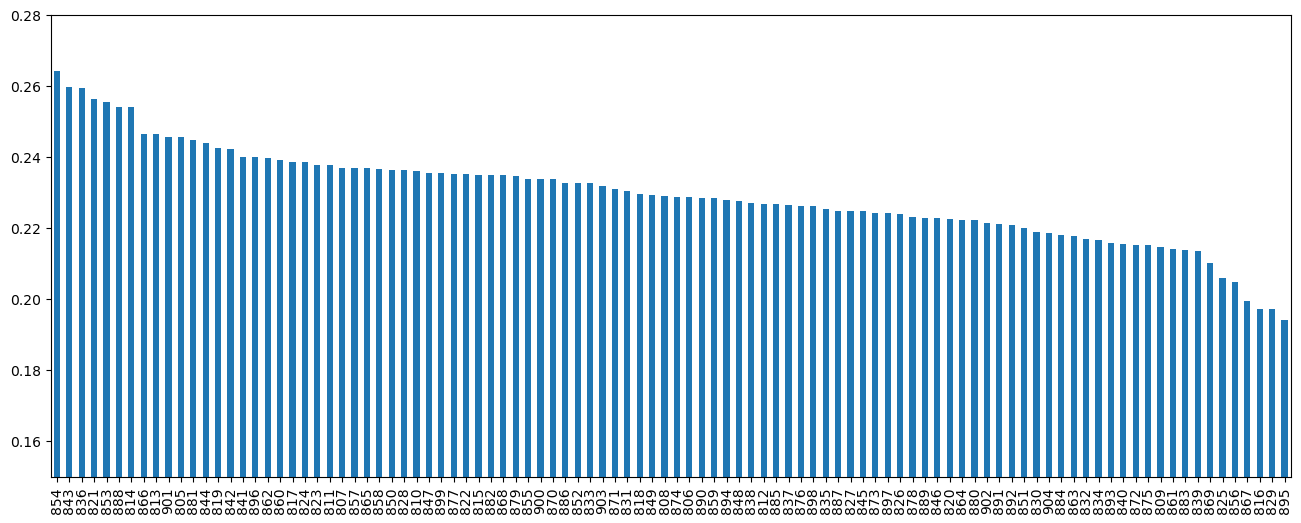

In [12]:
county_rank.query('state == "IA"').v049_rawvalue.sort_values(ascending = False).plot(kind = 'bar', figsize=(16,6)).set_ylim(0.15, 0.28)  #Excessive drinking raw
# Agregar el promedio estatal

(0.15, 0.28)

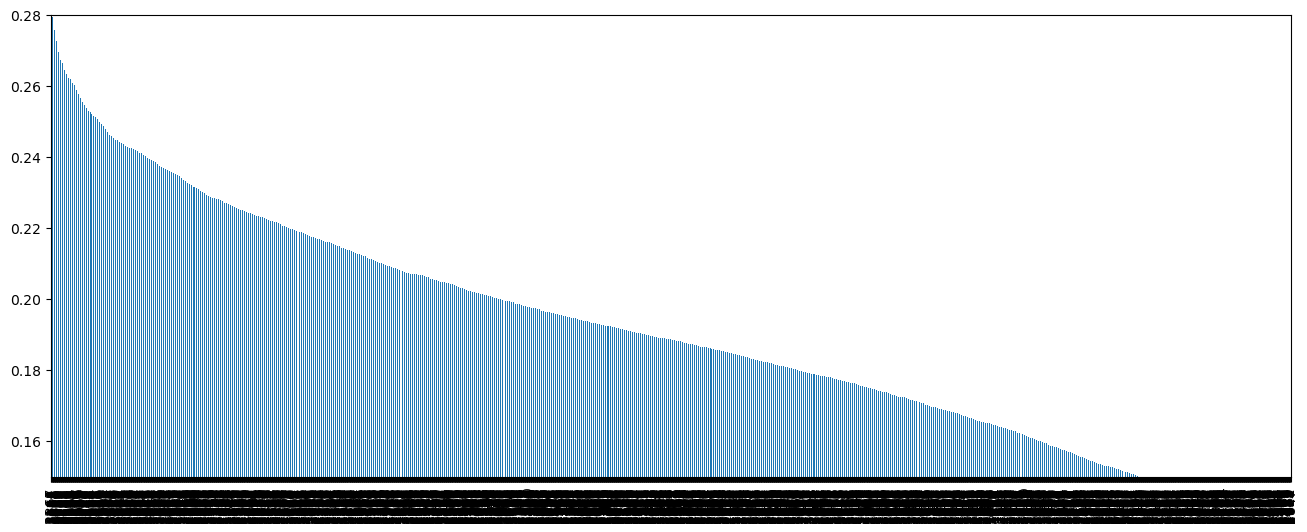

In [13]:
county_rank.query('state != "IA"').v049_rawvalue.sort_values(ascending = False).plot(kind = 'bar', figsize=(16,6)).set_ylim(0.15, 0.28)  #Excessive drinking raw

In [3]:
county_rank_2018 = pd.read_csv('Data/analytic_data2018.csv', header = 1)

(0.15, 0.28)

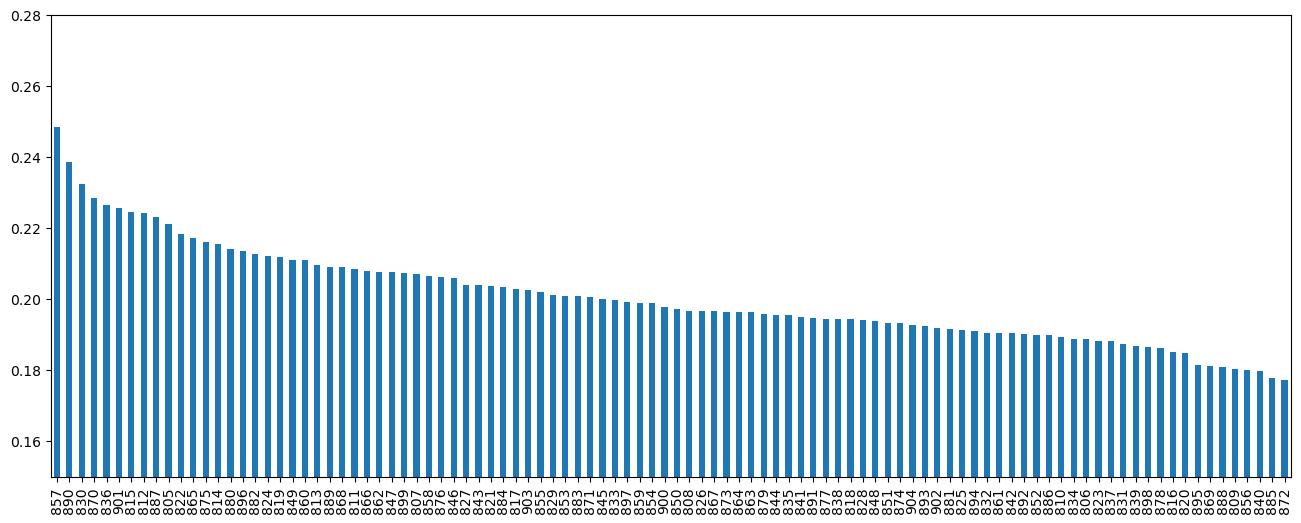

In [4]:
county_rank_2018.query('state == "IA"').v049_rawvalue.sort_values(ascending = False).plot(kind = 'bar', figsize=(16,6)).set_ylim(0.15, 0.28)  #Excessive drinking raw


In [12]:
county_rank.query('state == "IA"')[['statecode', 'countycode', 'fipscode', 'county']].head(20)
# state: 19
# county

,statecode,countycode,fipscode,county
805,19,0,19000,Iowa
806,19,1,19001,Adair County
807,19,3,19003,Adams County
808,19,5,19005,Allamakee County
809,19,7,19007,Appanoose County
810,19,9,19009,Audubon County
811,19,11,19011,Benton County
812,19,13,19013,Black Hawk County
813,19,15,19015,Boone County
814,19,17,19017,Bremer County


In [15]:
# Number of counties
county_rank.query('state == "IA"').fipscode.count() - 1

99

In [25]:
county_rank.query('state == "IA"').fipscode.iloc[0]

19000